In [213]:
import pyspark
print(pyspark.__version__)

3.1.2


In [214]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [215]:
spark=SparkSession.builder.appName('Coursework').getOrCreate()

In [216]:
import py4j

In [217]:
py4j

<module 'py4j' from 'C:\\Users\\pavan\\anaconda3\\lib\\site-packages\\py4j\\__init__.py'>

In [218]:
import findspark
findspark.init()
findspark.find()

'C:\\Users\\pavan\\OneDrive\\Desktop\\sparkhad\\spark-3.2.1-bin-hadoop3.2'

In [219]:
spark

In [989]:
df=spark.read.csv("train.csv",header=True,inferSchema=True)

In [990]:
df.show(1,vertical=True)

-RECORD 0---------------
 ID        | 13829      
 age       | 29         
 job       | technician 
 marital   | single     
 education | tertiary   
 default   | no         
 balance   | 18254      
 housing   | no         
 loan      | no         
 contact   | cellular   
 day       | 11         
 month     | may        
 campaign  | 2          
 pdays     | -1         
 previous  | 0          
 poutcome  | unknown    
 y         | no         
only showing top 1 row



In [991]:
df.columns

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [992]:
type(df)

pyspark.sql.dataframe.DataFrame

In [993]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [994]:
df.count(),len(df.columns)

(12870, 17)

In [995]:
df=df.withColumnRenamed('housing','house_loan') \
.withColumnRenamed('loan','personal_loan') \
.withColumnRenamed('default','credit_default')

https://stackoverflow.com/questions/44066635/selecting-only-numeric-string-columns-names-from-a-spark-df-in-pyspark

https://www.geeksforgeeks.org/pyspark-select-columns-by-type/

In [996]:
cat_cols = [x[0] for x in df.dtypes if x[1].startswith('string')]
num_cols=[x[0] for x in df.dtypes if x[1].startswith('int')]

In [997]:
num_cols.remove('ID')

In [998]:
df.select(num_cols).describe().show()

+-------+-----------------+------------------+-----------------+------------------+------------------+-----------------+
|summary|              age|           balance|              day|          campaign|             pdays|         previous|
+-------+-----------------+------------------+-----------------+------------------+------------------+-----------------+
|  count|            12870|             12870|            12870|             12870|             12870|            12870|
|   mean|41.09114219114219|1483.7744366744366|15.64110334110334| 2.659129759129759|45.555477855477854|0.688966588966589|
| stddev|11.30556005264463|3311.0551806357926|8.368983400380476|2.8635072567413555|104.44941134989585|2.049695990293478|
|    min|               18|             -6847|                1|                 1|                -1|                0|
|    max|               95|            102127|               31|                43|               854|               58|
+-------+-----------------+-----

In [999]:
df.filter("pdays==-1").groupBy('pdays','poutcome').count().show()

+-----+--------+-----+
|pdays|poutcome|count|
+-----+--------+-----+
|   -1| unknown|10067|
+-----+--------+-----+



In [1000]:
df.filter("pdays==-1").groupBy('pdays','previous').count().show()

+-----+--------+-----+
|pdays|previous|count|
+-----+--------+-----+
|   -1|       0|10067|
+-----+--------+-----+



In [1126]:
df.show(2,vertical=True)

-RECORD 0---------------------
 ID             | 22588       
 age            | 58          
 job            | blue-collar 
 marital        | married     
 education      | secondary   
 credit_default | no          
 balance        | 238         
 house_loan     | no          
 personal_loan  | no          
 contact        | cellular    
 day            | 15          
 month          | may         
 campaign       | 8           
 pdays          | -1          
 previous       | 0           
 poutcome       | unknown     
 y              | no          
 ifloan         | no          
-RECORD 1---------------------
 ID             | 19762       
 age            | 33          
 job            | management  
 marital        | single      
 education      | tertiary    
 credit_default | no          
 balance        | 215         
 house_loan     | yes         
 personal_loan  | no          
 contact        | cellular    
 day            | 27          
 month          | mar         
 campaig

In [1001]:
from pyspark.ml.feature import Bucketizer
bucketizer = Bucketizer(splits=[ 15,30, 45, 60,75, float('Inf') ],inputCol="age", outputCol="age_bins")
df_bins = bucketizer.setHandleInvalid("keep").transform(df)

df_bins.show(2)

+-----+---+----------+-------+---------+--------------+-------+----------+-------------+--------+---+-----+--------+-----+--------+--------+---+--------+
|   ID|age|       job|marital|education|credit_default|balance|house_loan|personal_loan| contact|day|month|campaign|pdays|previous|poutcome|  y|age_bins|
+-----+---+----------+-------+---------+--------------+-------+----------+-------------+--------+---+-----+--------+-----+--------+--------+---+--------+
|13829| 29|technician| single| tertiary|            no|  18254|        no|           no|cellular| 11|  may|       2|   -1|       0| unknown| no|     0.0|
|22677| 26|  services| single|secondary|            no|    512|       yes|          yes| unknown|  5|  jun|       3|   -1|       0| unknown| no|     0.0|
+-----+---+----------+-------+---------+--------------+-------+----------+-------------+--------+---+-----+--------+-----+--------+--------+---+--------+
only showing top 2 rows



In [1002]:
df_bins.groupBy('age_bins','y').count().show()

+--------+---+-----+
|age_bins|  y|count|
+--------+---+-----+
|     0.0|yes|  684|
|     3.0|yes|  361|
|     2.0|yes|  972|
|     3.0| no|  212|
|     4.0|yes|   98|
|     4.0| no|   45|
|     2.0| no| 2798|
|     0.0| no|  972|
|     1.0| no| 4876|
|     1.0|yes| 1852|
+--------+---+-----+



In [1003]:
#for values pdays=-1, all previous values are 0, all are unknown.---no error
# can create new variable as new_customers- for this campaign
#if previous contact is high then they might be long connected customers

In [1004]:
#age can also be converted to bins.
#day feature is not that useful
# pdays=-1 represents--> client was not previously contacted
#if pdays=-1 then previous value=0, probably poutcome-unknown
#days are from 1 to 31.
#credit_default, house_loan, personal_loan are boolean values.
#can also combine house loan and personal loan.- or operation

In [1005]:
df.select(cat_cols).describe().show()

+-------+-------+--------+---------+--------------+----------+-------------+--------+-----+--------+-----+
|summary|    job| marital|education|credit_default|house_loan|personal_loan| contact|month|poutcome|    y|
+-------+-------+--------+---------+--------------+----------+-------------+--------+-----+--------+-----+
|  count|  12870|   12870|    12870|         12870|     12870|        12870|   12870|12870|   12870|12870|
|   mean|   null|    null|     null|          null|      null|         null|    null| null|    null| null|
| stddev|   null|    null|     null|          null|      null|         null|    null| null|    null| null|
|    min| admin.|divorced|  primary|            no|        no|           no|cellular|  apr| failure|   no|
|    max|unknown|  single|  unknown|           yes|       yes|          yes| unknown|  sep| unknown|  yes|
+-------+-------+--------+---------+--------------+----------+-------------+--------+-----+--------+-----+



https://sparkbyexamples.com/pyspark/pyspark-find-count-of-null-none-nan-values/

In [1006]:
cat_cols.remove('y')
for i in cat_cols:
    print(df.select(i).distinct().collect())

[Row(job='management'), Row(job='retired'), Row(job='unknown'), Row(job='self-employed'), Row(job='student'), Row(job='blue-collar'), Row(job='entrepreneur'), Row(job='admin.'), Row(job='technician'), Row(job='services'), Row(job='housemaid'), Row(job='unemployed')]
[Row(marital='divorced'), Row(marital='married'), Row(marital='single')]
[Row(education='unknown'), Row(education='tertiary'), Row(education='secondary'), Row(education='primary')]
[Row(credit_default='no'), Row(credit_default='yes')]
[Row(house_loan='no'), Row(house_loan='yes')]
[Row(personal_loan='no'), Row(personal_loan='yes')]
[Row(contact='unknown'), Row(contact='cellular'), Row(contact='telephone')]
[Row(month='jun'), Row(month='aug'), Row(month='may'), Row(month='feb'), Row(month='sep'), Row(month='mar'), Row(month='oct'), Row(month='jul'), Row(month='nov'), Row(month='apr'), Row(month='dec'), Row(month='jan')]
[Row(poutcome='success'), Row(poutcome='unknown'), Row(poutcome='other'), Row(poutcome='failure')]


In [1007]:
# Find count for empty, None, Null, Nan with string literals.
from pyspark.sql.functions import col,isnan,when,count
nan_count = df.select([count(when(col(x).contains('None') | \
                            col(x).contains('NULL') | \
                            (col(x) == '' ) | \
                            col(x).isNull() | \
                            isnan(x), x
                           )).alias(x)
                    for x in df.columns])

nan_count.show()

+---+---+---+-------+---------+--------------+-------+----------+-------------+-------+---+-----+--------+-----+--------+--------+---+
| ID|age|job|marital|education|credit_default|balance|house_loan|personal_loan|contact|day|month|campaign|pdays|previous|poutcome|  y|
+---+---+---+-------+---------+--------------+-------+----------+-------------+-------+---+-----+--------+-----+--------+--------+---+
|  0|  0|  0|      0|        0|             0|      0|         0|            0|      0|  0|    0|       0|    0|       0|       0|  0|
+---+---+---+-------+---------+--------------+-------+----------+-------------+-------+---+-----+--------+-----+--------+--------+---+



In [1008]:
df.select('y').groupBy('y').count().show()

+---+-----+
|  y|count|
+---+-----+
| no| 8903|
|yes| 3967|
+---+-----+



In [1009]:
df=df.dropDuplicates()# there are no duplicates
df.count()  

12870

https://medium.com/@junwan01/oversampling-and-undersampling-with-pyspark-5dbc25cdf253

In [1010]:
major_df=df.filter("y=='no'")
minor_df=df.filter("y=='yes'")

In [1011]:
ratio=major_df.count()/minor_df.count()
usampled_df=major_df.sample(False,1/ratio,seed=20)
df=usampled_df.unionAll(minor_df)
df.select('y').groupBy('y').count().show()

In [1012]:
#from pyspark.sql.functions import col, explode, array, lit
#a = range(int(ratio))
# duplicate the minority rows
#oversampled_df = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# combine both oversampled minority rows and previous majority rows 
#df = major_df.unionAll(oversampled_df)

In [1013]:
df.count()

12870

In [1014]:
#It is an imbalanced dataset. using undersampling we can balance the dataset orelse the results will be biased.
#we can also use stratified k-fold technique for splitting the dataset- equally distributed.
#2.we can also try with imbalanced dataset and predict on test data.
#feature selection
#with standard scaling and without.
#categorical values with ordinal or onehot technique or by replacing based on present situation.Ex: education column
#different techniques- also combination of technique like ensemble tech
#plot values,confusion matrix, accuracy, precision, recall, r1_score comparision.
#Perform clustering technique.
#feature selection

In [1015]:
#If the accuracy is greater than 90% then the campaign might be huge success. So that bank institutions can 
#easily target thier customers without wasting time.- god point but don't include.

In [1016]:
df2=df.select(num_cols)

In [1017]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df2.columns, outputCol=vector_col)
df_vector = assembler.transform(df2).select(vector_col)

In [1018]:
matrix = Correlation.corr(df_vector, vector_col)
cor_np = matrix.collect()[0][matrix.columns[0]].toArray()

<AxesSubplot:>

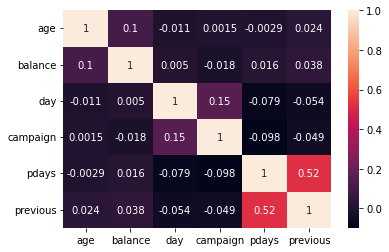

In [1019]:
import seaborn as sns
sns.heatmap(cor_np,annot=True,xticklabels=df2.columns, yticklabels=df2.columns)

In [1020]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F
#df.agg(F.skewness("age")).show()
#df=df.withColumn('age',F.log10(col('age')))
#df.agg(F.skewness("age")).show()

In [1021]:
#df=df.withColumn('previous',F.log(2+col('previous')))
#df=df.withColumn('pdays',F.log(2+col('pdays')))
#df=df.withColumn('campaign',F.log(2+col('campaign')))

In [1035]:
df=df.withColumn('ifloan',F.when((df.house_loan=='no') &(df.personal_loan=='no'),"no").otherwise("yes"))
cat_cols.remove('house_loan')
cat_cols.remove('personal_loan')
cat_cols.append('ifloan')

In [1036]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.ml.feature import StandardScaler

In [1094]:
def feature_transform(df,num_cols,cat_cols,label_col):
    #for creating a pipeline
    stages=[]
    
    #converting categorical values to numerical values
    #First applying stringindexer to convert categrical values to numerical
    pipe_string = [StringIndexer(inputCol= coln, outputCol= coln+"_encoded") for coln in cat_cols]
    
    #then onehot encoding helps to create sepearte column for each category
    pipe_one_hot = [OneHotEncoder(inputCol= coln+"_encoded", outputCol= coln+ "_onehot") for coln in cat_cols]
    cat_onehot_colns=[coln.getOutputCol() for coln in pipe_one_hot]
    
    #output label-y
    y_labeled=StringIndexer(inputCol=label_col,outputCol="y_labeled")
    allcolumns=num_cols+cat_onehot_colns
    final_assembler = VectorAssembler(inputCols=num_cols+cat_onehot_colns, outputCol="pred_features")
    
    #standard scaling,pred_scale- scaled predictor features
    pipe_scaler=StandardScaler(inputCol=final_assembler.getOutputCol(),outputCol="pred_scaled")
    
    #adding all the stages, helps in storage
    stages+=pipe_string+pipe_one_hot+[y_labeled]+[final_assembler]+[pipe_scaler]
    pp = Pipeline(stages= stages)
    df2 = pp.fit(df).transform(df)
    return df2,allcolumns

In [1095]:
df2,allcolumns=feature_transform(df,num_cols,cat_cols,'y')

# useful for converting back to string
label_indexer=StringIndexer(inputCol='y').fit(df2)

In [1096]:
final_df=df2.select("pred_features","pred_scaled","y_labeled","y")
final_df.show(2)

+--------------------+--------------------+---------+---+
|       pred_features|         pred_scaled|y_labeled|  y|
+--------------------+--------------------+---------+---+
|(40,[0,1,2,3,4,7,...|(40,[0,1,2,3,4,7,...|      0.0| no|
|(40,[0,1,2,3,4,6,...|(40,[0,1,2,3,4,6,...|      0.0| no|
+--------------------+--------------------+---------+---+
only showing top 2 rows



Basic Prediction

Transform into vector formation

In [1027]:
#chi-squared test
from pyspark.ml.feature import ChiSqSelector
selector = ChiSqSelector(numTopFeatures=35, featuresCol="pred_scaled",
                         outputCol="selectedFeatures", labelCol="y_labeled")

result = selector.fit(final_df).transform(final_df)
result.show()
final_df=result

+--------------------+--------------------+---------+---+--------------------+
|       pred_features|         pred_scaled|y_labeled|  y|    selectedFeatures|
+--------------------+--------------------+---------+---+--------------------+
|(41,[0,1,2,3,4,7,...|(41,[0,1,2,3,4,7,...|      0.0| no|(35,[0,1,2,3,4,7,...|
|(41,[0,1,2,3,4,6,...|(41,[0,1,2,3,4,6,...|      0.0| no|(35,[0,1,2,3,4,6,...|
|(41,[0,1,2,3,4,7,...|(41,[0,1,2,3,4,7,...|      0.0| no|(35,[0,1,2,3,4,7,...|
|(41,[0,1,2,3,4,10...|(41,[0,1,2,3,4,10...|      0.0| no|(35,[0,1,2,3,4,8,...|
|(41,[0,1,2,3,4,10...|(41,[0,1,2,3,4,10...|      0.0| no|(35,[0,1,2,3,4,8,...|
|(41,[0,1,2,3,4,8,...|(41,[0,1,2,3,4,8,...|      0.0| no|(35,[0,1,2,3,4,14...|
|(41,[0,1,2,3,4,7,...|(41,[0,1,2,3,4,7,...|      0.0| no|(35,[0,1,2,3,4,7,...|
|(41,[0,1,2,3,4,8,...|(41,[0,1,2,3,4,8,...|      0.0| no|(35,[0,1,2,3,4,14...|
|(41,[0,1,2,3,4,5,...|(41,[0,1,2,3,4,5,...|      1.0|yes|(35,[0,1,2,3,4,5,...|
|(41,[0,1,2,3,4,9,...|(41,[0,1,2,3,4,9,...|      0.0

In [1086]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics 
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [1087]:
#Splitting the dataset
(training_data, test_data) = final_df.randomSplit([0.8, 0.2],seed=3)

In [1088]:
def evaluation_metrics(evaluation_,labelcol,predictioncol,modelname):
    #Similar to confusion matrix
    evaluation_.groupBy(labelcol,predictioncol).count().show()
    
    #Calculating different metrics
    mul=MulticlassClassificationEvaluator(labelCol=labelcol,predictionCol=predictioncol)
    print(f"accuracy of {modelname}= ",mul.evaluate(evaluation_,{mul.metricName:"accuracy"}))
    print(f"R1 score of {modelname}= ",mul.evaluate(evaluation_,{mul.metricName:"f1"}))
    print(f"weighted Precision of {modelname}= ",mul.evaluate(evaluation_,{mul.metricName:"weightedPrecision"}))
    print(f"weighted Recall of {modelname}= ",mul.evaluate(evaluation_,{mul.metricName:"weightedRecall"}))

In [1052]:
lr = LogisticRegression(labelCol="y_labeled", featuresCol="pred_scaled")
lr_model=lr.fit(training_data)
predictions_=lr_model.transform(training_data)

#Area under ROC
evaluator = BinaryClassificationEvaluator(labelCol='y_labeled')
print("Area under ROC: ",evaluator.evaluate(predictions_, {evaluator.metricName: "areaUnderROC"}))

# Function takes 4 parameters- predictions,label column, predicted column, model name
evaluation_metrics(predictions_,"y_labeled","prediction",'logistic on test data')

Area under ROC:  0.7318177703487362
+---------+----------+-----+
|y_labeled|prediction|count|
+---------+----------+-----+
|      1.0|       1.0| 1041|
|      0.0|       1.0|  590|
|      1.0|       0.0| 2142|
|      0.0|       0.0| 6549|
+---------+----------+-----+

accuracy of logistic on test data=  0.7353226118969192
R1 score of logistic on test data=  0.7056322502241372
weighted Precision of logistic on test data=  0.7179893782201567
weighted Recall of logistic on test data=  0.7353226118969193


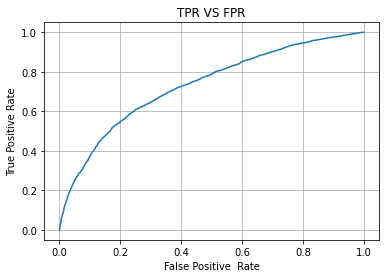

In [1053]:
import matplotlib.pyplot as plt
plt.plot(lr_model.summary.roc.select('FPR').collect(),lr_model.summary.roc.select('TPR').collect())
plt.grid()
plt.xlabel("False Positive  Rate")
plt.ylabel("True Positive Rate");
plt.title("TPR VS FPR");

In [1054]:
from pyspark.ml.classification import RandomForestClassifier
rf=RandomForestClassifier(labelCol="y_labeled", featuresCol="pred_features")
rf_model=rf.fit(training_data)
predictions_=rf_model.transform(test_data)

#Area under ROC
evaluator = BinaryClassificationEvaluator(labelCol='y_labeled')
print("Area under ROC: ",evaluator.evaluate(predictions_, {evaluator.metricName: "areaUnderROC"}))

# Function takes 4 parameters- predictions,label column, predicted column, model name
evaluation_metrics(predictions_,"y_labeled","prediction",'random forrest on test data')

Area under ROC:  0.7639170889444218
+---------+----------+-----+
|y_labeled|prediction|count|
+---------+----------+-----+
|      1.0|       1.0|  262|
|      0.0|       1.0|   95|
|      1.0|       0.0|  522|
|      0.0|       0.0| 1669|
+---------+----------+-----+

accuracy of random forrest on test data=  0.7578492935635793
R1 score of random forrest on test data=  0.725610737598359
weighted Precision of random forrest on test data=  0.7531806037725977
weighted Recall of random forrest on test data=  0.7578492935635792


In [1089]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="y_labeled", featuresCol="pred_features")
gbt_model=gbt.fit(training_data)
predictions_=gbt_model.transform(test_data)

#Area under ROC
evaluator = BinaryClassificationEvaluator(labelCol='y_labeled')
print("Area under ROC: ",evaluator.evaluate(predictions_, {evaluator.metricName: "areaUnderROC"}))

# Function takes 4 parameters- predictions,label column, predicted column, model name
evaluation_metrics(predictions_,"y_labeled","prediction",'Gradient boosting on test data')

Area under ROC:  0.7786439879771374
+---------+----------+-----+
|y_labeled|prediction|count|
+---------+----------+-----+
|      1.0|       1.0|  346|
|      0.0|       1.0|  147|
|      1.0|       0.0|  410|
|      0.0|       0.0| 1645|
+---------+----------+-----+

accuracy of Gradient boosting on test data=  0.7813971742543171
R1 score of Gradient boosting on test data=  0.7658541313293552
weighted Precision of Gradient boosting on test data=  0.7712135561886084
weighted Recall of Gradient boosting on test data=  0.7813971742543171


In [67]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [80]:
params = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .build())

In [1098]:
import pandas as pd
imp_list = pd.Series(gbt_model.featureImportances.values)
sorted_imp = imp_list.sort_values(ascending= False)
imp_indexes = list((sorted_imp[sorted_imp > 0.001]).index)

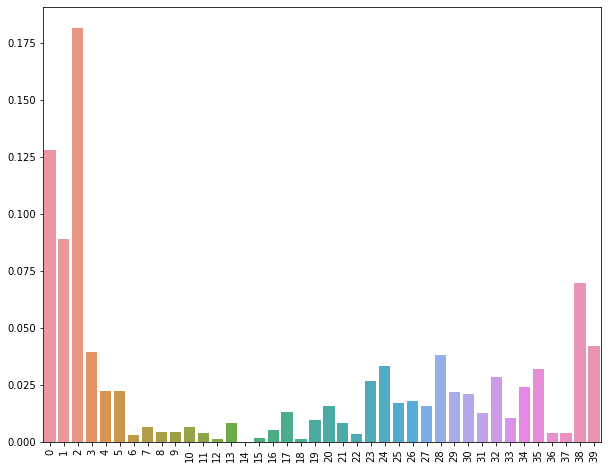

In [1101]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x=sorted_imp.index,y=sorted_imp.values)
plt.xticks(rotation=90);

In [1064]:
from pyspark.ml.feature import VectorSlicer
vector_slicer = VectorSlicer(inputCol= "pred_scaled", indices= imp_indexes, outputCol= "feature_subset")
with_selected_feature = vector_slicer.transform(training_data)

rf_modified = GBTClassifier(featuresCol="feature_subset",labelCol='y_labeled')
test_data_some = vector_slicer.transform(test_data)
prediction_modified = rf_modified.fit(with_selected_feature).transform(test_data_some)

evaluator_modified = BinaryClassificationEvaluator(rawPredictionCol="probability", metricName= "areaUnderROC",labelCol="y_labeled")
print(evaluator_modified.evaluate(prediction_modified))

# Function takes 4 parameters- predictions,label column, predicted column, model name
evaluation_metrics(prediction_modified,"y_labeled","prediction",'random forrest on test data')

0.7761559130454914
+---------+----------+-----+
|y_labeled|prediction|count|
+---------+----------+-----+
|      1.0|       1.0|  345|
|      0.0|       1.0|  120|
|      1.0|       0.0|  439|
|      0.0|       0.0| 1644|
+---------+----------+-----+

accuracy of random forrest on test data=  0.7806122448979592
R1 score of random forrest on test data=  0.7616919633965555
weighted Precision of random forrest on test data=  0.7746891115481702
weighted Recall of random forrest on test data=  0.7806122448979592


In [764]:
from pyspark.ml.feature import PCA
pca = PCA(k=35, inputCol="pred_scaled", outputCol="pcaFeatures")
model_pca = pca.fit(final_df)
result = model_pca.transform(final_df)
result.show(1,truncate=False)

+---------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+---+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [765]:
#Splitting the dataset
(training_data, test_data) = result.randomSplit([0.7, 0.3],seed=20)

In [766]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="y_labeled", featuresCol="pcaFeatures", maxIter=100)
gbt_model=gbt.fit(training_data)
predictions_=gbt_model.transform(test_data)

#Area under ROC
evaluator = BinaryClassificationEvaluator(labelCol='y_labeled')
print("Area under ROC: ",evaluator.evaluate(predictions_, {evaluator.metricName: "areaUnderROC"}))

# Function takes 4 parameters- predictions,label column, predicted column, model name
evaluation_metrics(predictions_,"y_labeled","prediction",'random forrest on test data')

Area under ROC:  0.7604699676696361
+---------+----------+-----+
|y_labeled|prediction|count|
+---------+----------+-----+
|      1.0|       1.0|  583|
|      0.0|       1.0|  262|
|      1.0|       0.0|  666|
|      0.0|       0.0| 2339|
+---------+----------+-----+

accuracy of random forrest on test data=  0.758961038961039
R1 score of random forrest on test data=  0.7443942659565299
weighted Precision of random forrest on test data=  0.778369384359401
weighted Recall of random forrest on test data=  0.8992695117262591


In [ ]:
paramGrid = ParamGridBuilder() \
    .addGrid(hashingTF.numFeatures, [10, 100, 1000]) \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=2)

In [918]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
for k in range(2,10,1):
    kmeans=KMeans(featuresCol='pred_scaled').setK(k).setSeed(1)
    modelk=kmeans.fit(final_df)
    predictions_=modelk.transform(final_df)
    evaluator=ClusteringEvaluator().setFeaturesCol('pred_scaled')
    silhouette = evaluator.evaluate(predictions_)
    print(f"Silhouette of kvalue {k} = " + str(silhouette))

Silhouette of kvalue 2 = 0.28608637159630596
Silhouette of kvalue 4 = 0.13928802850124886
Silhouette of kvalue 6 = 0.15173206003599102
Silhouette of kvalue 8 = 0.13559961182086194
Silhouette of kvalue 10 = 0.14250064282668834
Silhouette of kvalue 12 = 0.17832378438090601
Silhouette of kvalue 14 = 0.15039947567436926
Silhouette of kvalue 16 = 0.1544733879808028
Silhouette of kvalue 18 = 0.20544473138872216


In [1114]:
kmeans=KMeans(featuresCol='pred_scaled').setK(2).setSeed(1)
modelk=kmeans.fit(df2)
predictions_=modelk.transform(df2)

In [1123]:
predictions_=predictions_.withColumn('prediction',predictions_.prediction.cast('double'))

In [1124]:
#Area under ROC
evaluator = BinaryClassificationEvaluator(labelCol='y_labeled',rawPredictionCol='prediction')
print("Area under ROC: ",evaluator.evaluate(predictions_, {evaluator.metricName: "areaUnderROC"}))

# Function takes 4 parameters- predictions,label column, predicted column, model name
evaluation_metrics(predictions_,"y_labeled","prediction",'random forrest on test data')

Area under ROC:  0.6034102076716762
+---------+----------+-----+
|y_labeled|prediction|count|
+---------+----------+-----+
|      1.0|       1.0| 1426|
|      0.0|       1.0| 1359|
|      1.0|       0.0| 2541|
|      0.0|       0.0| 7544|
+---------+----------+-----+

accuracy of random forrest on test data=  0.696969696969697
R1 score of random forrest on test data=  0.6798773636817146
weighted Precision of random forrest on test data=  0.6752939182392242
weighted Recall of random forrest on test data=  0.696969696969697


In [374]:
predictions_.groupBy('y','prediction').count().show()

+---+----------+-----+
|  y|prediction|count|
+---+----------+-----+
| no|         0| 6018|
| no|         1| 2885|
|yes|         0| 3535|
|yes|         1|  432|
+---+----------+-----+



In [ ]:
predictions_.groupBy('y','prediction').count().show()

In [332]:
from pyspark.mllib.linalg.distributed import RowMatrix
import numpy as np
confusion_matrix=np.array(predictions_.groupBy('y_labeled','prediction').count().select('count').collect()).reshape(2,2)

In [334]:
predictions_.groupBy('y_labeled','prediction').count().show()

+---------+----------+-----+
|y_labeled|prediction|count|
+---------+----------+-----+
|      1.0|       1.0|  559|
|      0.0|       1.0|  271|
|      1.0|       0.0|  633|
|      0.0|       0.0| 2387|
+---------+----------+-----+



Text(0.5, 15.0, '')

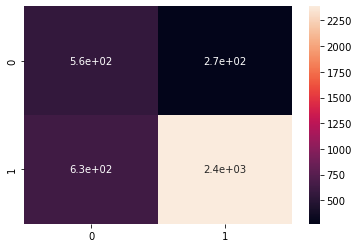

In [333]:
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True)
plt.xlabel("")

Additional Analysis

In [ ]:
from pyspark.mllib.stat import Statistics
summary = Statistics.colStats(mat)
print(summary.mean())
print(summary.variance())
print(summary.numNonzeros())

In [140]:
from pyspark import SparkContext
from pyspark.mllib.linalg import Vectors, Matrices
from pyspark.mllib.stat import Statistics
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.stat import Statistics

In [193]:
az=final_df.select('y_labeled','pred_scaled')
az=az.withColumnRenamed('y_labeled','label').withColumnRenamed('pred_scaled','features')

In [199]:
az.show(1)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(41,[0,1,2,3,4,7,...|
+-----+--------------------+
only showing top 1 row

